# 第3章 2つの変数の記述統計

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
import math
import datetime as dt

import numpy as np
import scipy
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import output_notebook, show
#from bokeh.plotting import figure

sns.set(font_scale=1.5)
#plt.rcParams['font.family'] = 'IPAexGothic'

### 共分散・相関係数
第2章で取得したCSVデータをそのまま使用する

In [85]:
path = os.path.join('cache', 'shidouhou.csv')
df = pd.read_csv(path, encoding='cp932')
df = df[['psych_test', 'stat_test1', 'stat_test2']]
df.head(5)

,psych_test,stat_test1,stat_test2
0,13,6,10
1,14,10,13
2,7,6,8
3,12,10,15
4,10,5,8


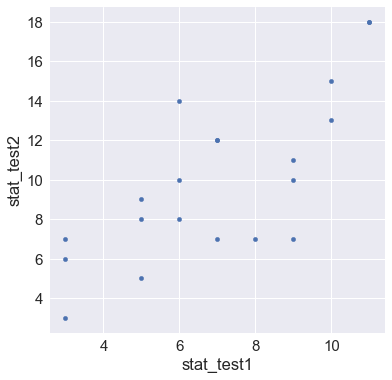

In [81]:
# 統計テスト1と統計テスト2の散布図
fig, ax = plt.subplots(figsize=(6,6))
df.plot(ax=ax, kind='scatter', x='stat_test1', y='stat_test2')

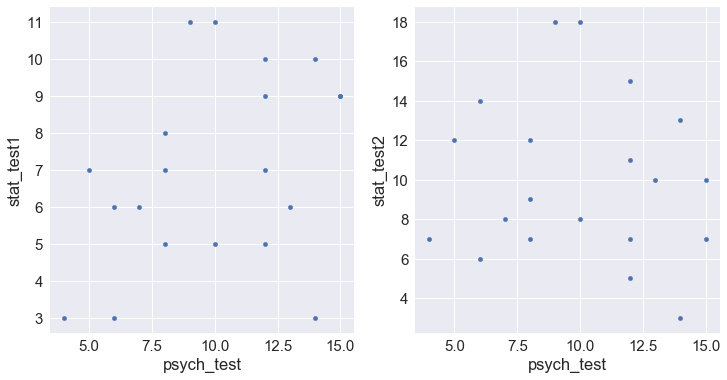

In [80]:
# 心理学テストと統計テストの散布図
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
df.plot(ax=axes[0], kind='scatter', x='psych_test', y='stat_test1')
df.plot(ax=axes[1], kind='scatter', x='psych_test', y='stat_test2')

In [91]:
# 不偏共分散は pandas.DataFrame.cov() で求まる
df.cov()

,psych_test,stat_test1,stat_test2
psych_test,11.684211,3.368421,-1.315789
stat_test1,3.368421,6.631579,7.947368
stat_test2,-1.315789,7.947368,16.947368


In [92]:
# 標準共分散に変換
length = len(df)
df.cov() * (length - 1) / length

,psych_test,stat_test1,stat_test2
psych_test,11.10,3.20,-1.25
stat_test1,3.20,6.30,7.55
stat_test2,-1.25,7.55,16.10


In [93]:
# 相関係数は pandas.DataFrame.corr() で求まる
df.corr(method='pearson')

,psych_test,stat_test1,stat_test2
psych_test,1.000000,0.382665,-0.093505
stat_test1,0.382665,1.000000,0.749659
stat_test2,-0.093505,0.749659,1.000000


相関係数の大きさはの評価

- $|r| \leq 0.2$ : ほとんど相関なし
- $|r| \leq 0.4$ : 弱い相関あり
- $|r| \leq 0.7$ : 中程度の相関あり
- $|r| \leq 1.0$ : 強い相関あり

### クロス集計表・ファイ係数

In [94]:
math = ['dislike', 'dislike', 'like', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike',
        'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'dislike']
stat = ['like', 'like', 'like', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike',
        'like', 'like', 'like', 'dislike', 'like', 'dislike', 'dislike', 'dislike', 'dislike', 'dislike']
df = pd.DataFrame()
df['math'] = math
df['stat'] = stat

In [95]:
# 度数分布
df['stat'].value_counts()

dislike    12
like        8
Name: stat, dtype: int64

In [64]:
# クロス集計表
pd.crosstab(df['math'], df['stat'])

stat,dislike,like
math,,
dislike,10,4
like,2,4


In [73]:
# ダミー変数に変換
df2 = pd.get_dummies(df, drop_first=True)
df2.head(5)

,math_like,stat_like
0,0,1
1,0,1
2,1,1
3,1,1
4,0,0


In [75]:
# このタミー変数同士の相関係数がファイ係数
df2.corr()

,math_like,stat_like
math_like,1.000000,0.356348
stat_like,0.356348,1.000000
